In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
dataset = pd.read_csv('./features_complete_v3.csv')
dataset.shape

(6007, 44)

In [4]:
dataset.describe()

,comments count,section,type,person,people,cat,dog,other animal,poster,clothing,...,look,new,people.1,right,old,say,year,still,score,log_score
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,...,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,71.330281,2.029133,1.290994,0.275512,0.142667,0.020809,0.021475,0.016814,0.037290,0.119194,...,0.013984,0.012818,0.012152,0.011653,0.011820,0.011653,0.011487,0.010821,14.584979,2.343117
std,153.086018,0.760530,0.454258,0.446809,0.349762,0.142757,0.144973,0.128584,0.189487,0.324044,...,0.117433,0.112500,0.109576,0.107328,0.108082,0.107328,0.106567,0.103467,13.707147,0.965250
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.125000,1.634131
50%,20.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.333333,2.512306
75%,80.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.428571,3.064725
max,2707.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,115.567901,4.758474


# Ciljno obeležje

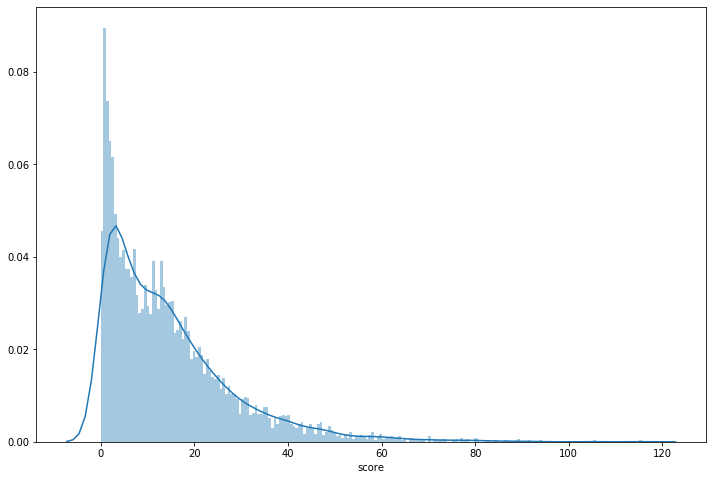

In [5]:
# Onako kakvo je sračunato na osnovu formule upvote/(downvote+1)

sb.distplot(dataset['score'], bins=200, kde=True)

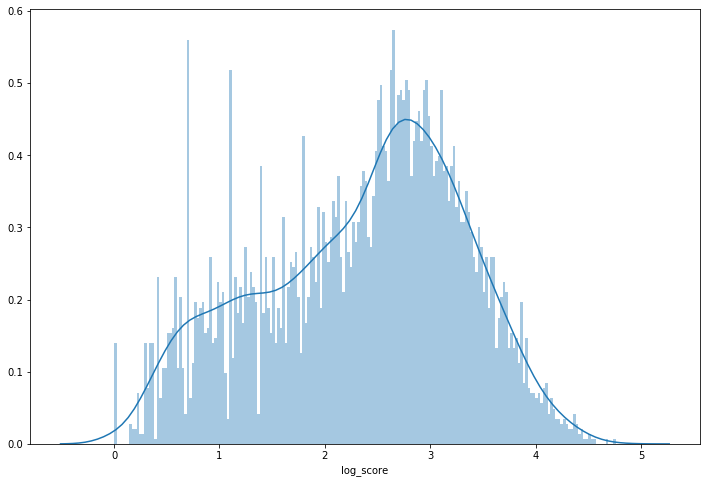

In [192]:
# Nakon primene logaritamske transformacije

sb.distplot(dataset['log_score'], bins=200, kde=True)

Positive scores : 5330
Negative scores : 677


<BarContainer object of 2 artists>

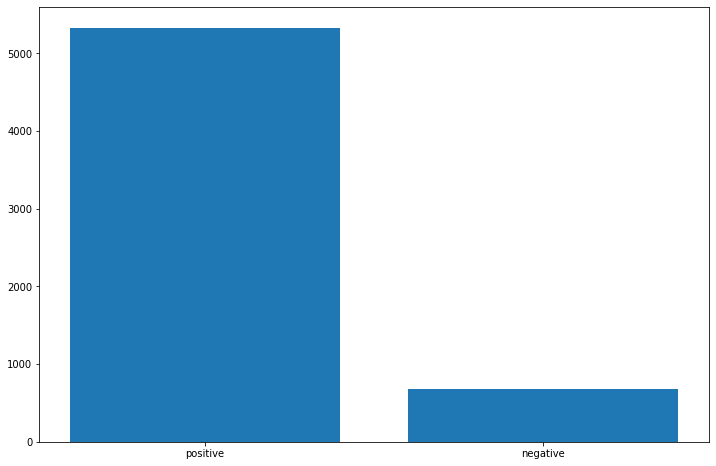

In [37]:
# Odnos pozitivnih i negativnih odnosa glasova

pos = (dataset['score'] >= 1).sum()
neg = (dataset['score'] < 1).sum()

print("Positive scores :", pos)
print("Negative scores :", neg)

plt.bar(['positive', 'negative'], [pos, neg])

# Sekcija

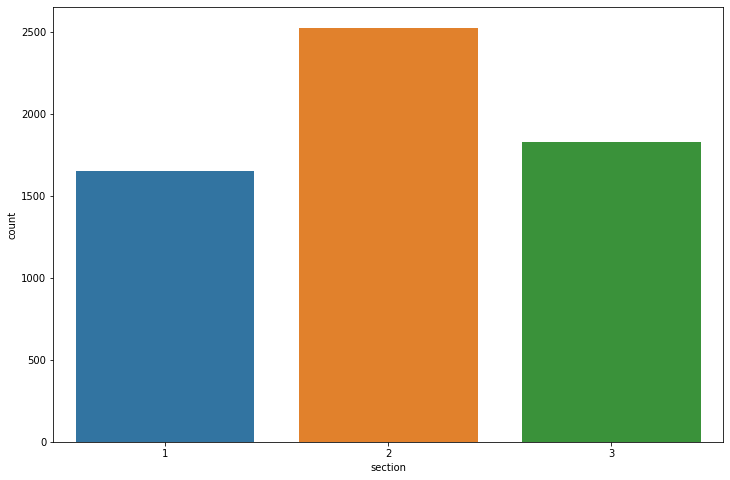

In [12]:
# hot -> 1; trending -> 2; fresh -> 3
sb.countplot(dataset['section'])

Median for section_hot : 21.35363485016648
Median for section_trending : 13.0
Median for section_fresh : 2.2

Mean for section_hot : 24.96258404872159
Mean for section_trending : 16.07737061913736
Mean for section_fresh : 3.136390226995746


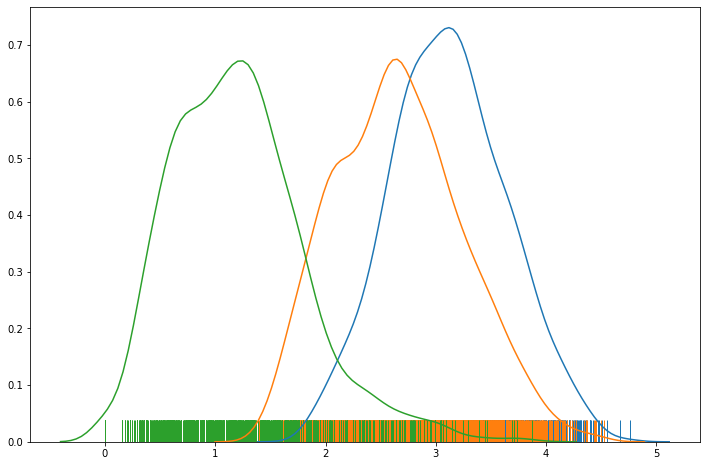

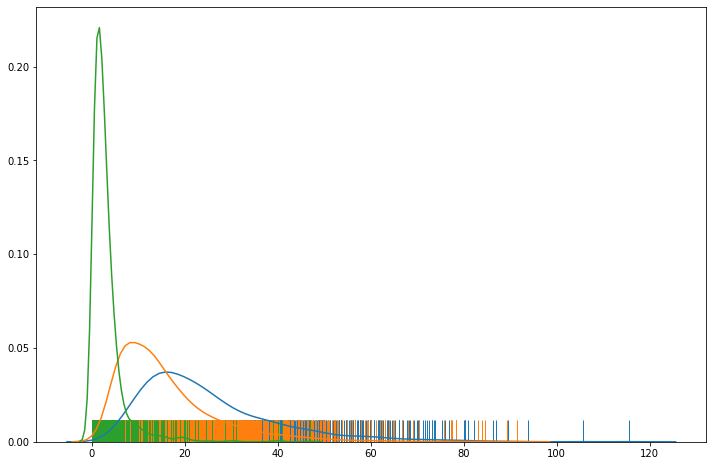

In [10]:
# Odnos sekcije i skora
# Prvi grafik je za logaritmovani skor, a drugi za originalni

section_hot = dataset.loc[dataset['section'] == 1]
section_trending = dataset.loc[dataset['section'] == 2]
section_fresh = dataset.loc[dataset['section'] == 3]

print("Median for section_hot :", section_hot['score'].median())
print("Median for section_trending :", section_trending['score'].median())
print("Median for section_fresh :", section_fresh['score'].median())
print()
print("Mean for section_hot :", section_hot['score'].mean())
print("Mean for section_trending :", section_trending['score'].mean())
print("Mean for section_fresh :", section_fresh['score'].mean())

sb.distplot(section_hot[['log_score']], hist=False, rug=True)
sb.distplot(section_trending[['log_score']], hist=False, rug=True)
sb.distplot(section_fresh[['log_score']], hist=False, rug=True)

plt.show()

sb.distplot(section_hot[['score']], hist=False, rug=True)
sb.distplot(section_trending[['score']], hist=False, rug=True)
sb.distplot(section_fresh[['score']], hist=False, rug=True)

plt.show()

# Tip

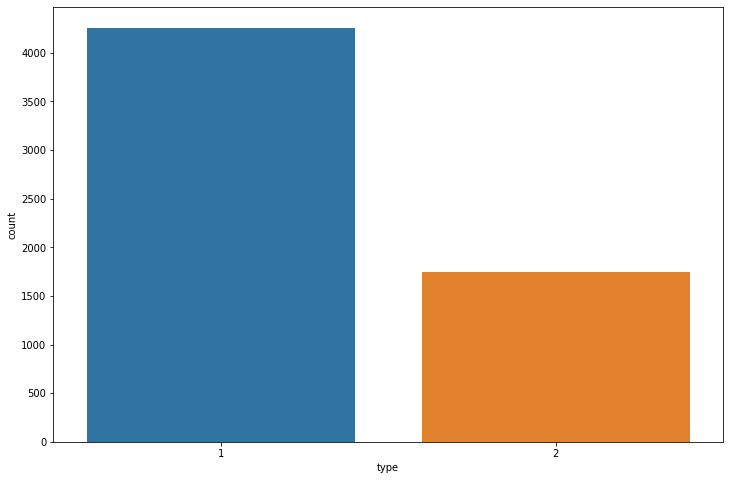

In [11]:
# photo -> 1; animated -> 2
sb.countplot(dataset['type'])

Median for photos : 9.96470588235294
Median for animated : 14.188261351052049

Mean for photos : 13.383466542713908
Mean for animated : 17.512461506275752


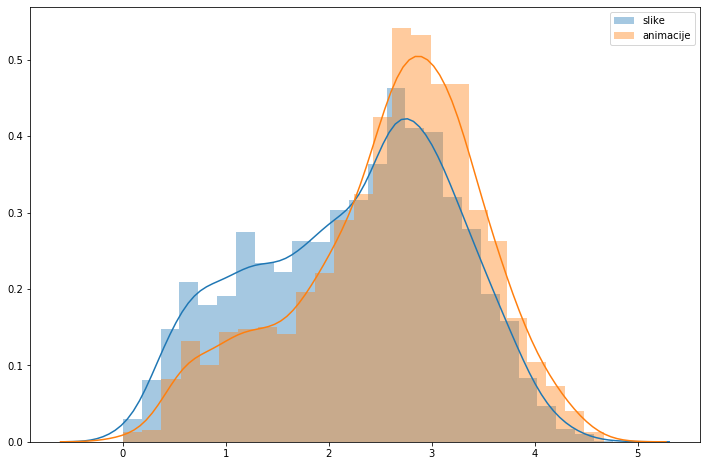

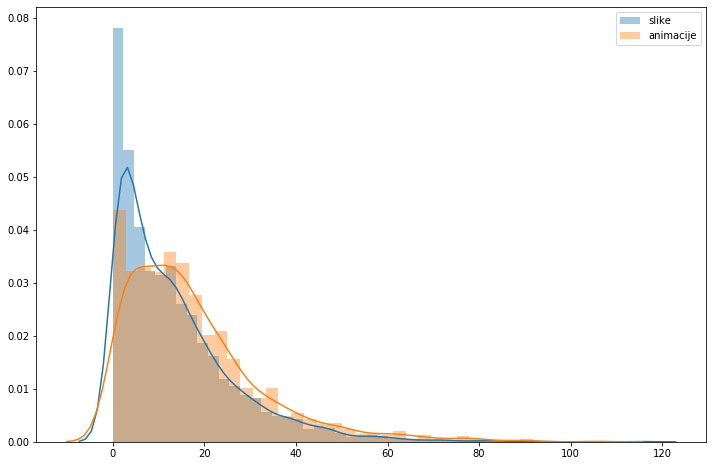

In [13]:
# Odnos tipa multimedijalnog sadržaja i skora
# Prvi grafik je za logaritmovani skor, a drugi za originalni

photo = dataset.loc[dataset['type'] == 1]
animated = dataset.loc[dataset['type'] == 2]

print("Median for photos :", photo['score'].median())
print("Median for animated :", animated['score'].median())
print()
print("Mean for photos :", photo['score'].mean())
print("Mean for animated :", animated['score'].mean())

sb.distplot(photo[['log_score']], hist=True, label='slike')
sb.distplot(animated[['log_score']], hist=True, label='animacije')

plt.legend()
plt.show()

sb.distplot(photo[['score']], hist=True, label='slike')
sb.distplot(animated[['score']], hist=True, label='animacije')

plt.legend()
plt.show()

# Komentari

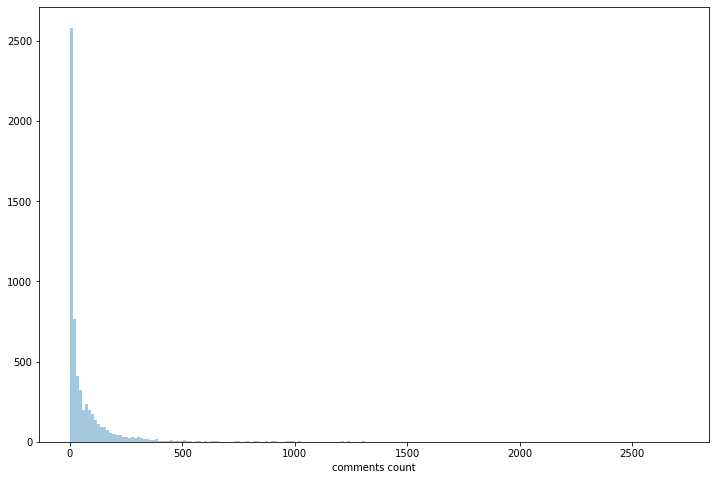

In [14]:
sb.distplot(dataset['comments count'], bins=200, kde=False)

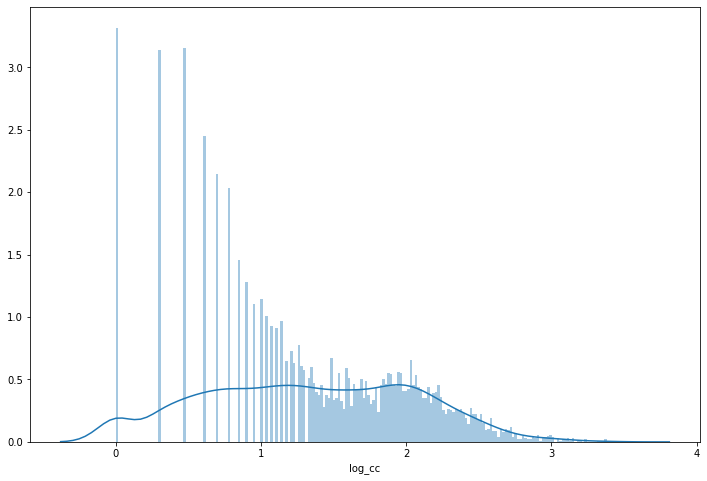

In [16]:
ccs = dataset['comments count']

dataset['log_cc'] = np.log10(ccs+1)

sb.distplot(dataset['log_cc'], bins=200, kde=True)

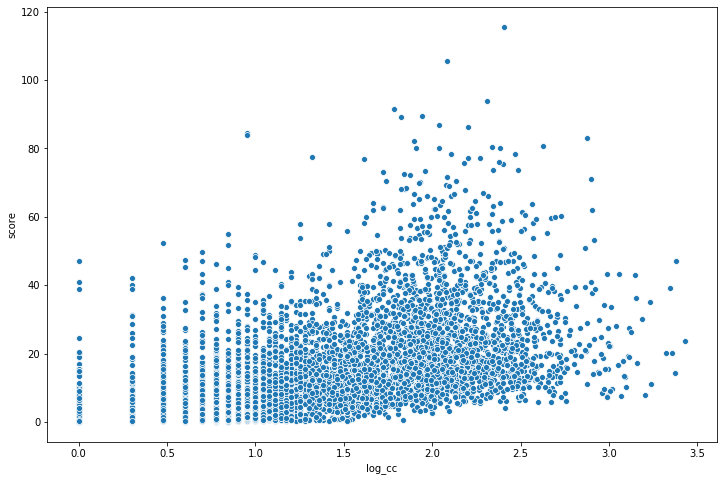

In [17]:
sb.scatterplot(x='log_cc', y='score', data=dataset)

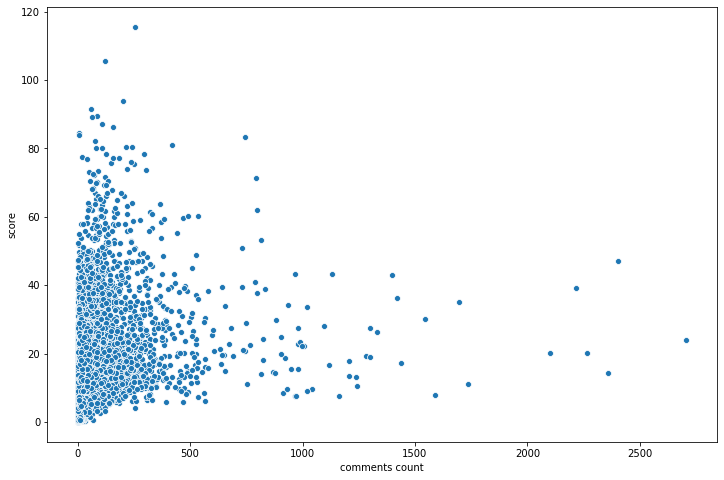

In [18]:
sb.scatterplot(x='comments count', y='score', data=dataset)

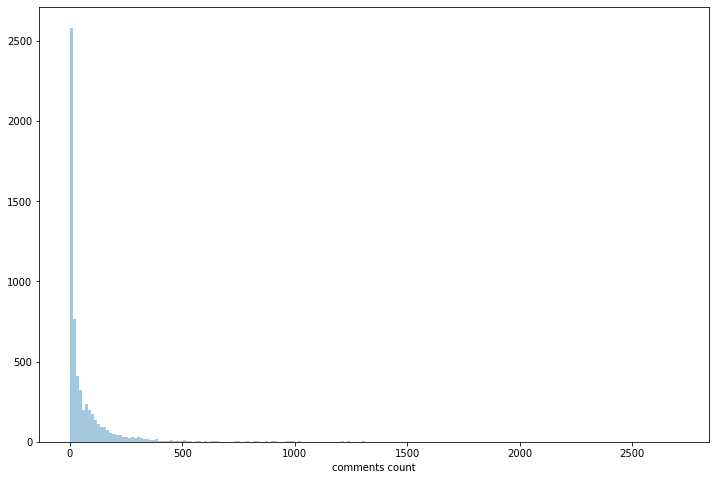

In [19]:
sb.distplot(dataset['comments count'], bins=200, kde=False)

In [22]:
no_comments = (dataset['comments count'] == 0).sum()
print("No comments :", no_comments)

no_comments = (dataset['comments count'] < 10).sum()
print("Less than 10 comments :", no_comments)

print("Median number of comments :", dataset['comments count'].median())

No comments : 342
Less than 10 comments : 2189
Median number of comments : 20.0


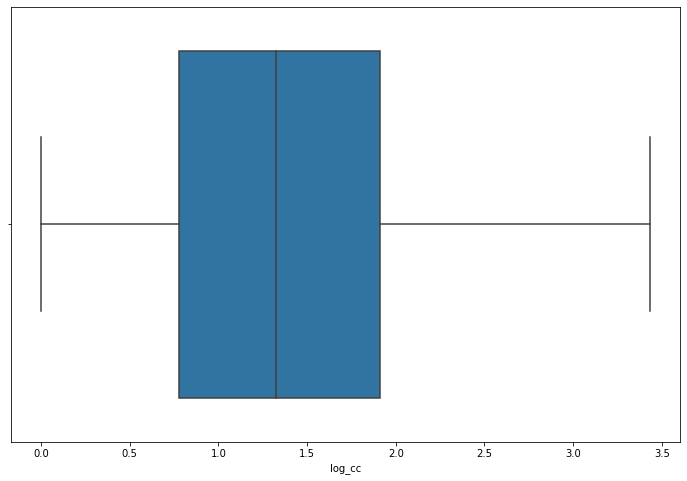

In [26]:
# sb.boxplot(x=dataset['comments count'])
sb.boxplot(x=dataset['log_cc'])

lambda : 0.9943253078608026
Std dev : 1.2419600315267652


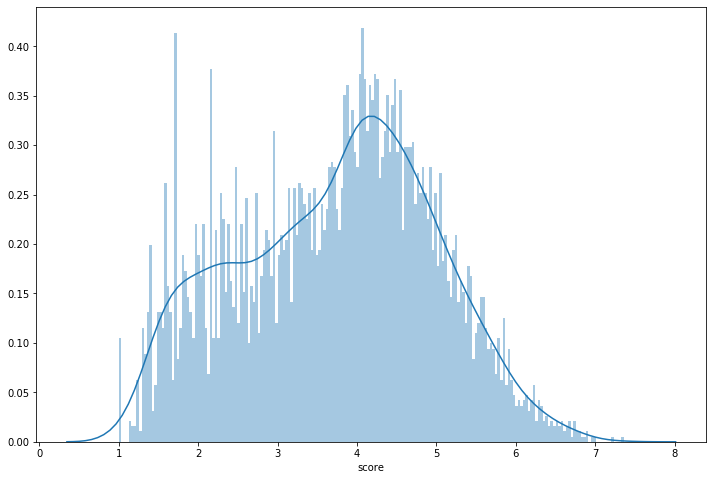

In [29]:
# Koriscenje boxcox funkcije, kako bi se što bolje normalizovalo ciljano obeležje

from scipy import stats
import statistics

x = dataset['score'] + 1

dataset['score'], l = stats.boxcox(x)

print("lambda :", l)
print("Std dev :", statistics.stdev(x))

sb.distplot(x, bins=200, kde=True)

# Matrica korelacije

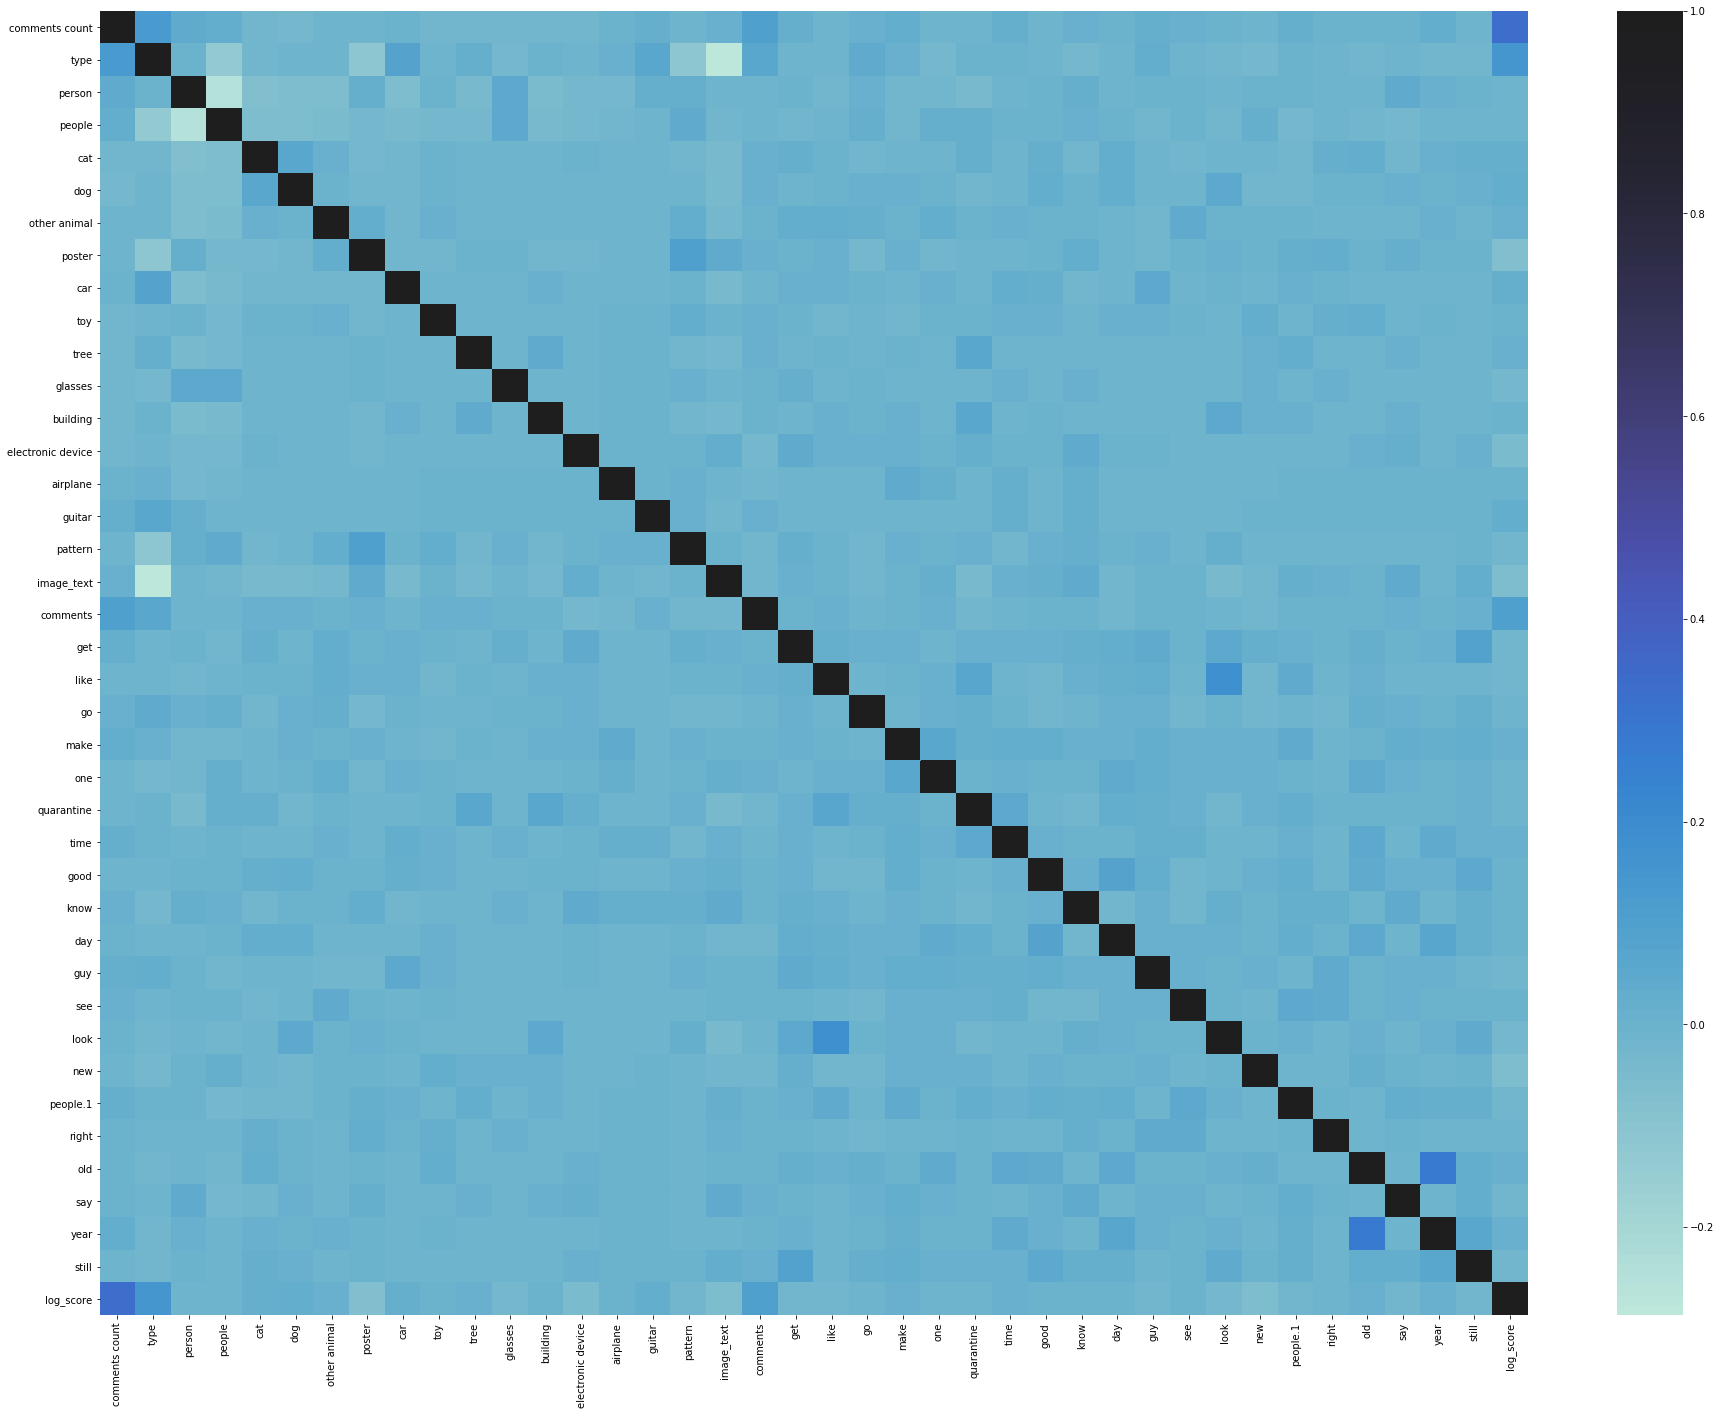

In [33]:
# Matrica korelacije za obeležja koja se uzimaju u obzir u predikciji popularnosti

copy_dataset = dataset.copy()

del copy_dataset['score']
del copy_dataset['clothing']
del copy_dataset['section']
del copy_dataset['log_cc']

# copy_dataset['image_text_log'] = stats.boxcox(copy_dataset['image_text']+1, 0)

plt.rcParams["figure.figsize"] = (32,24)
sb.heatmap(copy_dataset.corr(), annot=False, center=1)
plt.rcParams["figure.figsize"] = (12,8)

Mean number of comments on photos : 58.45667997182437
Mean number of comments on animated posts : 102.69679633867277


<BarContainer object of 2 artists>

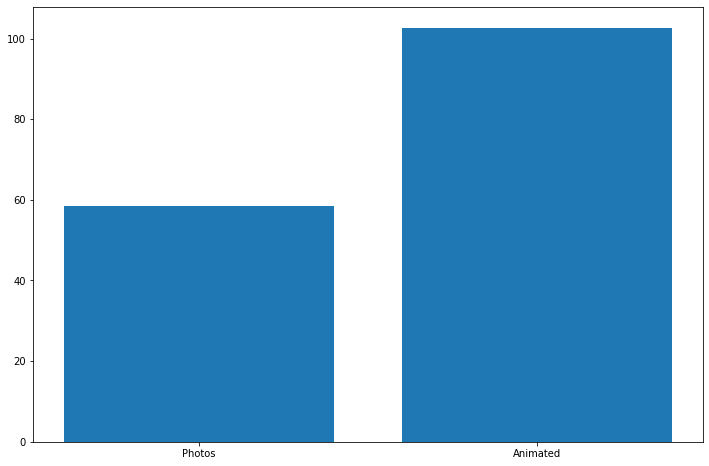

In [39]:
# Broj komentara po tipu multimedijalnog sadržaja

photos = dataset.loc[dataset['type'] == 1]
animated = dataset.loc[dataset['type'] == 2]

print("Mean number of comments on photos :", photos['comments count'].mean())
print("Mean number of comments on animated posts :", animated['comments count'].mean())

plt.bar(['Photos', 'Animated'], [photos['comments count'].mean(), animated['comments count'].mean()])

# Predikcije

In [40]:
df_pred = pd.read_csv('./predictions.csv')
df_pred.shape

(1202, 2)

In [41]:
df_pred.describe()

,y,prediction
count,1202.000000,1202.000000
mean,2.373059,2.360963
std,0.953544,0.653698
min,0.000000,1.106966
25%,1.721734,1.755484
50%,2.517283,2.509376
75%,3.100020,3.012680
max,4.477337,3.402097


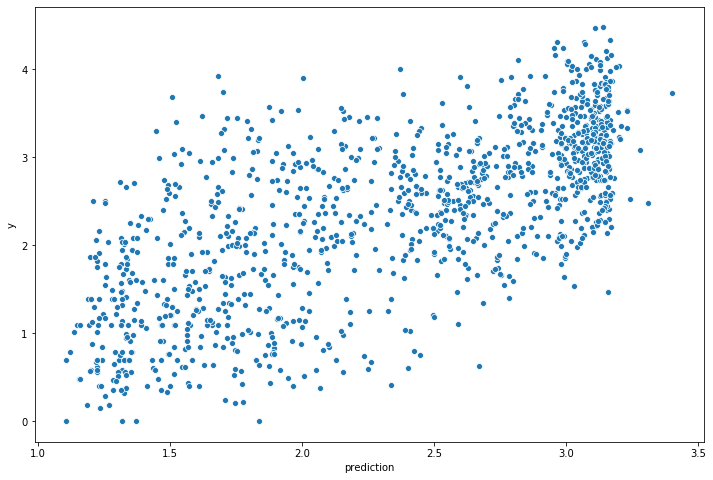

In [42]:
sb.scatterplot(x='prediction', y='y', data=df_pred)

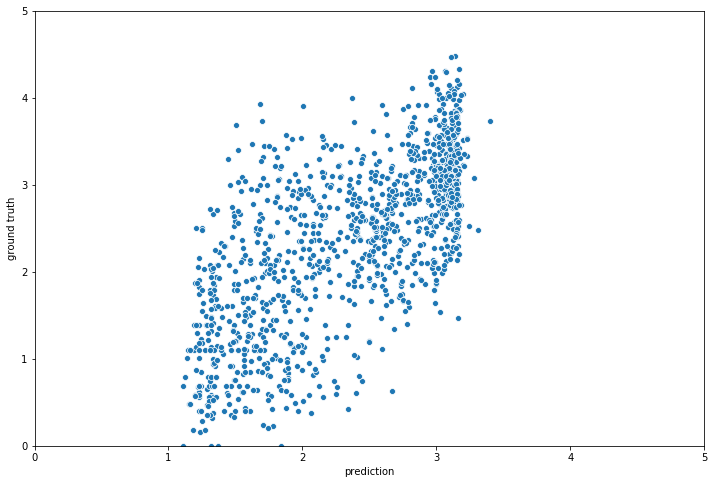

In [43]:
fig, ax = plt.subplots()
sb.scatterplot(x='prediction', y='y', data=df_pred, ax=ax)
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set(ylabel = "ground truth")
plt.show()

# Distribucija detektovanih objekata

In [48]:
import csv

In [49]:
PERSON =             0b000000000000001
PEOPLE =             0b000000000000010
CAT =                0b000000000000100
DOG =                0b000000000001000
OTHER_ANIMAL =       0b000000000010000
POSTER =             0b000000000100000
CLOTHING =           0b000000001000000
CAR =                0b000000010000000
TOY =                0b000000100000000
TREE =               0b000001000000000
GLASSES =            0b000010000000000
BUILDING =           0b000100000000000
ELECTRONIC_DEVICE =  0b001000000000000
AIRPLANE =           0b010000000000000
GUITAR =             0b100000000000000

person_cnt = 0
people_cnt = 0
cat_cnt = 0
dog_cnt = 0
other_animal_cnt = 0
poster_cnt = 0
clothing_cnt = 0
car_cnt = 0
toy_cnt = 0
tree_cnt = 0
glasses_cnt = 0
building_cnt = 0
electronic_device_cnt = 0
airplane_cnt = 0
guitar_cnt = 0



In [50]:
person_cnt = 0
people_cnt = 0
cat_cnt = 0
dog_cnt = 0
other_animal_cnt = 0
poster_cnt = 0
clothing_cnt = 0
car_cnt = 0
toy_cnt = 0
tree_cnt = 0
glasses_cnt = 0
building_cnt = 0
electronic_device_cnt = 0
airplane_cnt = 0
guitar_cnt = 0

with open('mapped_detections.csv', 'r', newline='') as mapped_file:
    lines = list(csv.reader(mapped_file))

    for line in lines:

        feature_vector = int(line[1], 2)

        # print("Image ", line[0], ": ", end='')
        # print(format(feature_vector, '#017b'))

        # print()
        
        if feature_vector & PERSON != 0:
            person_cnt += 1
        
        if feature_vector & PEOPLE != 0:
            people_cnt += 1
        
        if feature_vector & CAT != 0:
            cat_cnt += 1
        
        
        
        
        if feature_vector & DOG != 0:
            dog_cnt += 1
            
        if feature_vector & OTHER_ANIMAL != 0:
            other_animal_cnt += 1
            
        if feature_vector & POSTER != 0:
            poster_cnt += 1
        
        
        
            
        if feature_vector & CLOTHING != 0:
            clothing_cnt += 1
            
        if feature_vector & CAR != 0:
            car_cnt += 1
            
        if feature_vector & TOY != 0:
            toy_cnt += 1
            
        
        
        if feature_vector & TREE != 0:
            tree_cnt += 1
            
        if feature_vector & GLASSES != 0:
            glasses_cnt += 1
            
        if feature_vector & BUILDING != 0:
            building_cnt += 1
            
            
        
        if feature_vector & ELECTRONIC_DEVICE != 0:
            electronic_device_cnt += 1
            
        if feature_vector & AIRPLANE != 0:
            airplane_cnt += 1
            
        if feature_vector & GUITAR != 0:
            guitar_cnt += 1
        

In [51]:
print(person_cnt)
print(people_cnt)
print(cat_cnt)
print(dog_cnt)
print(other_animal_cnt)
print(poster_cnt)
print(clothing_cnt)
print(car_cnt)
print(toy_cnt)
print(tree_cnt)
print(glasses_cnt)
print(building_cnt)
print(electronic_device_cnt)
print(airplane_cnt)
print(guitar_cnt)

all_cnt = [person_cnt,
people_cnt,
cat_cnt,
dog_cnt,
other_animal_cnt,
poster_cnt,
#clothing_cnt,
car_cnt,
toy_cnt,
tree_cnt,
glasses_cnt,
building_cnt,
electronic_device_cnt,
airplane_cnt,
guitar_cnt]

1655
857
125
129
101
224
716
87
65
40
33
46
58
15
14


In [52]:
all_cnt

[1655, 857, 125, 129, 101, 224, 87, 65, 40, 33, 46, 58, 15, 14]

<BarContainer object of 14 artists>

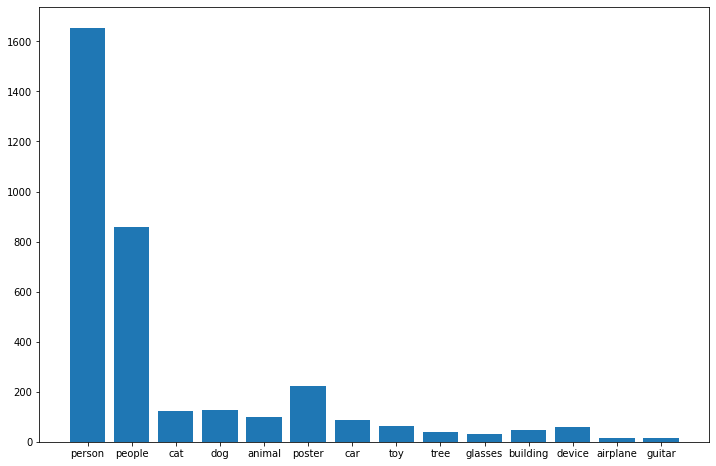

In [53]:
plt.bar(['person', 'people', 
         'cat', 'dog', 'animal', 'poster', 
         #'clothing', 
         'car', 'toy', 'tree', 'glasses',
         'building', 'device', 'airplane', 'guitar'
        ], 
         all_cnt)

# Dužina teksta na slikama

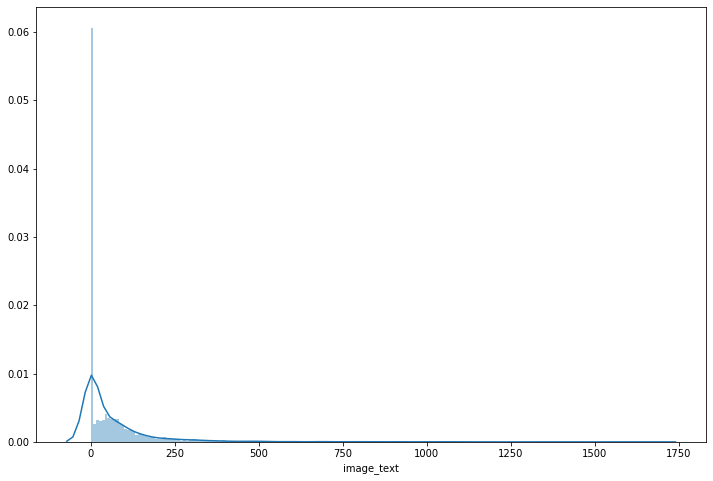

In [54]:
# Distribucija dužina teksta na slikama

sb.distplot(dataset['image_text'], bins=200, kde=True)

[Text(0.5, 0, 'text length')]

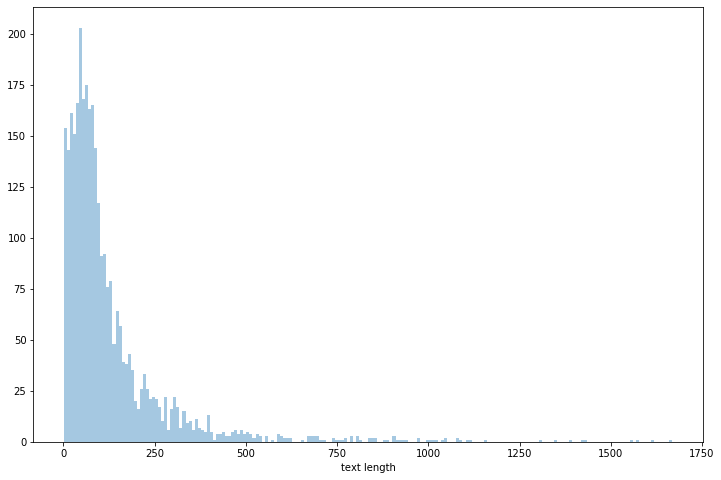

In [58]:
# Distribucija dužina teksta na slikama na kojima je prepoznat tekst (dužina teksta veća od nula)

from scipy import stats

it = dataset[dataset.image_text>0]

# it['image_text_log'] = stats.boxcox(it['image_text'], 0)

fig, ax = plt.subplots()
sb.distplot(it['image_text'], bins=200, kde=False)
ax.set(xlabel='text length')